In [25]:
import tifffile
import numpy as np
from stl import mesh

!ls 663500562798

img = tifffile.imread("./663500562798/V2_2_105.75_15.98.tif")

img = img.reshape(img.shape[0], img.shape[1], 1)

V2_2_105.75_15.98.tif          logfile.txt
V2_2_105.75_15.98_tile_1_1.stl


In [26]:
img.shape

(418, 195, 1)

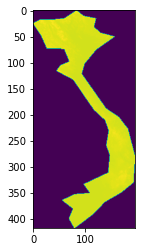

In [75]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [30]:
import numpy
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Using an existing stl file:
your_mesh = mesh.Mesh.from_file('./663500562798/V2_2_105.75_15.98_tile_1_1.stl')
your_mesh.vectors.shape


(92064, 3, 3)

In [77]:
your_mesh.vectors

array([[[  0.41025642, 161.64102   ,   5.4365387 ],
        [  0.        , 161.23077   ,   5.9026113 ],
        [  0.41025642, 161.23077   ,   6.0191293 ]],

       [[  0.41025642, 161.64102   ,   0.        ],
        [  0.41025642, 161.23077   ,   0.        ],
        [  0.        , 161.23077   ,   0.        ]],

       [[  0.        , 161.23077   ,   5.9026113 ],
        [  0.41025642, 161.64102   ,   5.4365387 ],
        [  0.41025642, 161.64102   ,   0.        ]],

       ...,

       [[ 79.589745  ,  50.05128   ,   0.        ],
        [ 79.589745  ,  50.46154   ,   0.        ],
        [ 80.        ,  50.46154   ,   0.        ]],

       [[ 80.        ,  50.46154   ,   2.3008733 ],
        [ 79.589745  ,  50.05128   ,   2.881989  ],
        [ 79.589745  ,  50.05128   ,   0.        ]],

       [[ 80.        ,  50.46154   ,   2.3008733 ],
        [ 79.589745  ,  50.05128   ,   0.        ],
        [ 80.        ,  50.46154   ,   0.        ]]], dtype=float32)

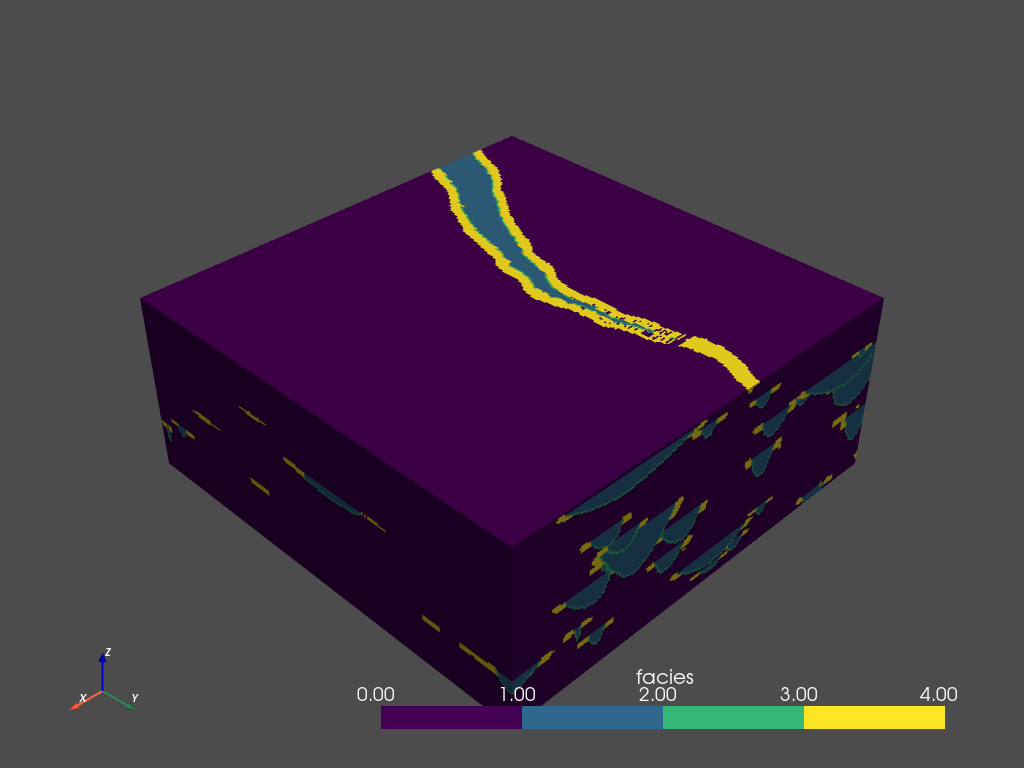

[(534.8076211353316, 534.8076211353316, 459.80762113533166),
 (125.0, 125.0, 50.0),
 (0.0, 0.0, 1.0)]

In [32]:
import pyvista as pv
from pyvista import examples
import matplotlib.pyplot as plt
import numpy as np

mesh = examples.load_channels()
# define a categorical colormap
cmap = plt.cm.get_cmap("viridis", 4)


mesh.plot(cmap=cmap)

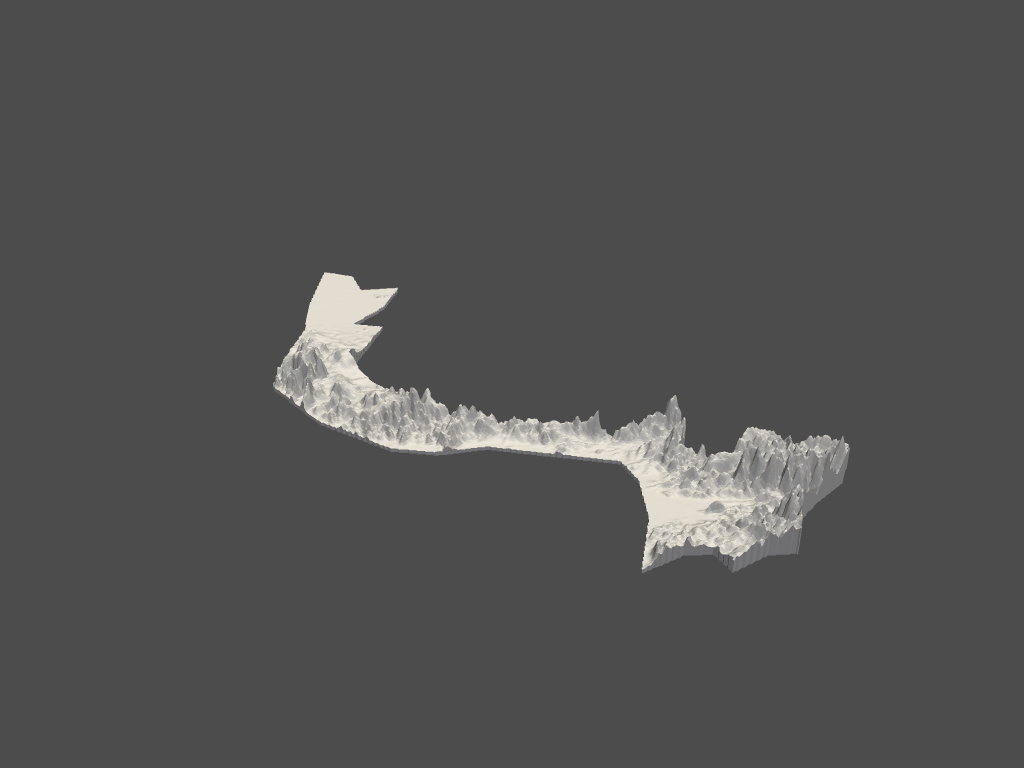

[(251.67317482796756, 297.4167661365613, 218.90099093285647),
 (40.0, 85.74359130859375, 7.227816104888916),
 (0.0, 0.0, 1.0)]

In [40]:
import pyvistaqt as pvqt

# p = pvqt.BackgroundPlotter()
p = pv.Plotter()

viet_mesh = pv.read('./663500562798/V2_2_105.75_15.98_tile_1_1.stl')
# p = pv.Plotter(notebook=True)

p.add_mesh(viet_mesh)
p.show()
# viet_mesh.plot(show_edges=True, lighting=False)

[0.0, 80.0, -1.4432899320127035e-15, 171.4871826171875, 0.0, 14.455632209777832]
[40.0, 85.74359130859375, 7.227816104888916]


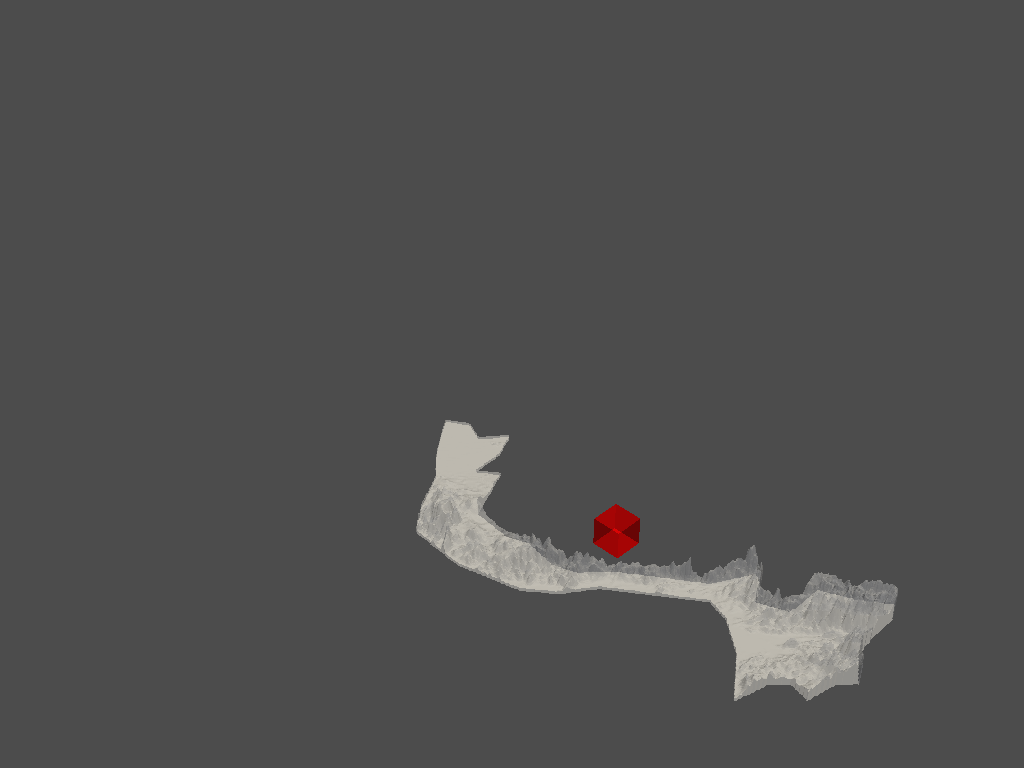

[(300.0, 300.0, 300.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [64]:

roi = pv.Cube(center=viet_mesh.center, x_length=10, y_length=10, z_length=10)
print(viet_mesh.bounds)
print(viet_mesh.center)

cpos = [(300,300,300),
 (0,0,0),
 (0, 0, 1)]


p = pv.Plotter()
p.add_mesh(viet_mesh, opacity=0.5)
p.add_mesh(roi, opacity=0.75, color="red")


p.show(cpos=cpos)

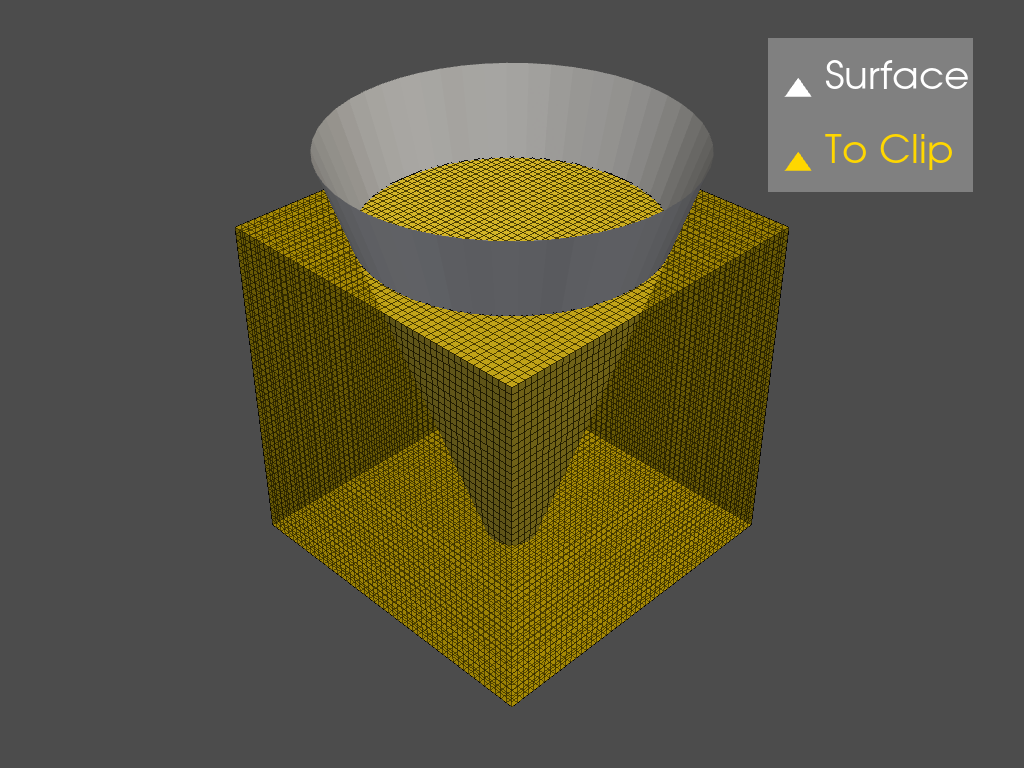

[(4.622235903444128, 4.622235903444128, 4.642235903444129),
 (-0.020000000000000018, -0.020000000000000018, 0.0),
 (0.0, 0.0, 1.0)]

In [65]:
surface = pv.Cone(direction=(0,0,-1), height=3.0, radius=1,
                  resolution=50, capping=False)

# Make a gridded dataset
n = 51
xx = yy = zz = 1 - np.linspace(0, n, n) * 2 / (n-1)
dataset = pv.RectilinearGrid(xx, yy, zz)

# Preview the problem
p = pv.Plotter()
p.add_mesh(surface, color='w', label='Surface')
p.add_mesh(dataset, color='gold', show_edges=True,
           opacity=0.75, label='To Clip')
p.add_legend()
p.show()

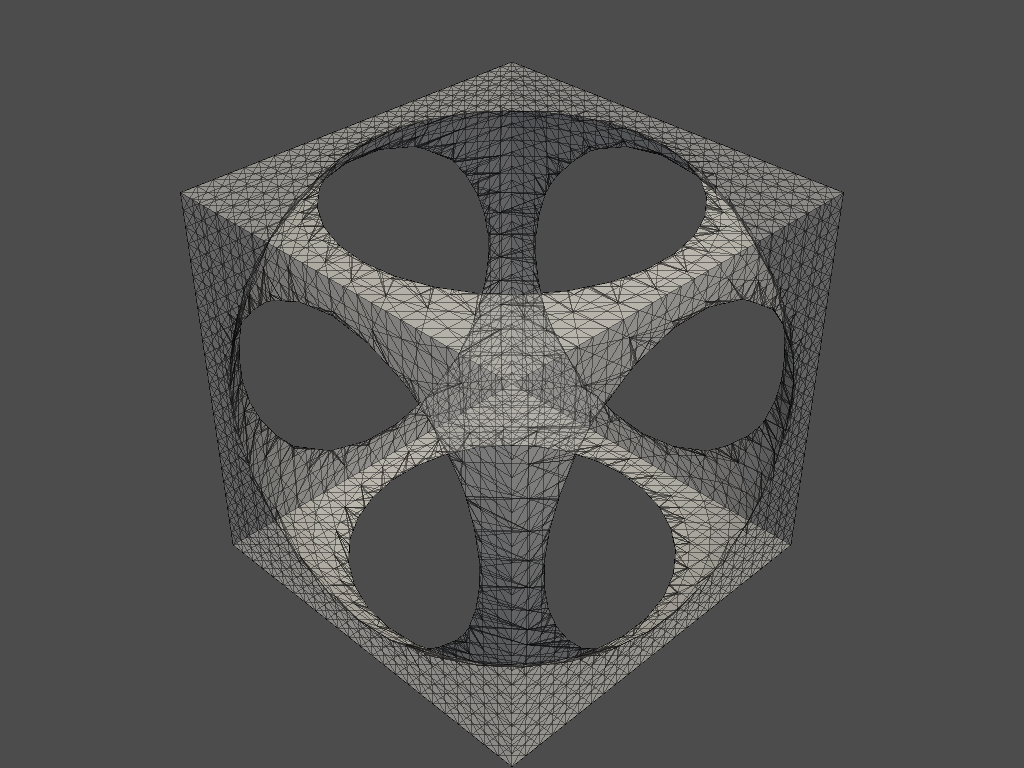

[(1.9318516525781368, 1.9318516525781368, 1.9318516525781368),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [71]:
def make_cube():
    x = np.linspace(-0.5, 0.5, 25)
    grid = pv.StructuredGrid(*np.meshgrid(x, x, x))
    return grid.extract_surface().triangulate()

# Create to examplee PolyData meshes for boolean operations
sphere = pv.Sphere(radius=0.65, center=(0, 0, 0))
cube = make_cube()

union = sphere.boolean_union(cube)

p = pv.Plotter()
p.add_mesh(union,  opacity=0.5, show_edges=True, color=True)
p.show()

In [74]:
viet_mesh.bounds

[0.0,
 80.0,
 -1.4432899320127035e-15,
 171.4871826171875,
 0.0,
 14.455632209777832]